In [79]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

'wget' is not recognized as an internal or external command,
operable program or batch file.


,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [81]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [82]:
#Evaluating Data 
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [83]:
dataset['region'] = dataset['region'].map({'northwest':1,'southeast':2,'southwest':3 ,'northeast':4})
dataset['smoker']= dataset['smoker'].map({'no':0,'yes':1})

In [84]:
dataset['sex']=dataset['sex'].map({'female':0,'male':1})

In [85]:
#observing  the correlation of Expenses with certain Features
dataset.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.020856,0.109341,0.042469,-0.025019,0.005967,0.299008
sex,-0.020856,1.000000,0.046380,0.017163,0.076185,0.000825,0.057292
bmi,0.109341,0.046380,1.000000,0.012645,0.003968,-0.056803,0.198576
children,0.042469,0.017163,0.012645,1.000000,0.007673,-0.018816,0.067998
smoker,-0.025019,0.076185,0.003968,0.007673,1.000000,0.002181,0.787251
region,0.005967,0.000825,-0.056803,-0.018816,0.002181,1.000000,0.003642
expenses,0.299008,0.057292,0.198576,0.067998,0.787251,0.003642,1.000000


In [86]:
dataset.groupby('region')['expenses'].agg('mean')

region
1    12417.575169
2    14735.411538
3    12346.937908
4    13406.384691
Name: expenses, dtype: float64

In [87]:
dataset = dataset.drop(['sex','children','region'],axis=1)

In [88]:
train_dataset= dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [89]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')


In [90]:
train_dataset

,age,bmi,smoker
578,52,30.2,0
610,47,29.4,0
569,48,40.6,1
1034,61,38.4,0
198,51,18.1,0
...,...,...,...
584,19,20.7,0
147,51,37.7,0
160,42,26.6,1
750,37,26.4,1


In [91]:
#normalising data
#applying z score
train_stats = train_dataset.describe()
train_stats =train_stats.transpose()
train_stats
def norm(x):
    return(x-train_stats['mean'])/train_stats['std']

norm_train_data = norm(train_dataset)
norm_test_data = norm(test_dataset)

In [92]:
#Building the model
model = keras.Sequential()
model.add(layers.Dense(100,activation='relu',input_shape=(3,)))
model.add(layers.Dense(5,activation='linear'))
#model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(1))

In [93]:
opitimzer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mae',optimizer=opitimzer,metrics=['mae','mse'])

In [94]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 100)               400       
                                                                 
 dense_20 (Dense)            (None, 5)                 505       
                                                                 
 dense_21 (Dense)            (None, 1)                 6         
                                                                 
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


In [95]:
health_cost = model.fit(train_dataset,train_labels,epochs=1000,validation_split=0.2,verbose=0,batch_size=100)

In [96]:

hist = pd.DataFrame(health_cost.history)
hist['epoch'] = health_cost.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,3457.181641,3457.181641,37472276.0,3853.497559,3853.497559,42901652.0,995
996,3455.162598,3455.162598,37412944.0,3849.936035,3849.936035,42960524.0,996
997,3456.246826,3456.246826,37334640.0,3849.453857,3849.453857,42935492.0,997
998,3453.094727,3453.094727,37440548.0,3851.044922,3851.044922,42817220.0,998
999,3452.549561,3452.549561,37302804.0,3849.498535,3849.498535,42721720.0,999


In [97]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error Expenses')
  plt.legend()
  plt.grid(True)

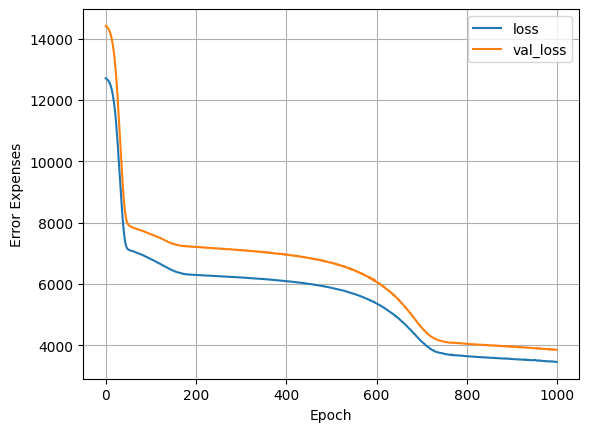

In [98]:
plot_loss(health_cost)

9/9 - 0s - loss: 4135.4478 - mae: 4135.4478 - mse: 50559608.0000 - 156ms/epoch - 17ms/step
Testing set Mean Abs Error: 4135.45 expenses
The Mean Abs Error must be less than 3500. Keep trying.
9/9 [==============================] - 0s 12ms/step


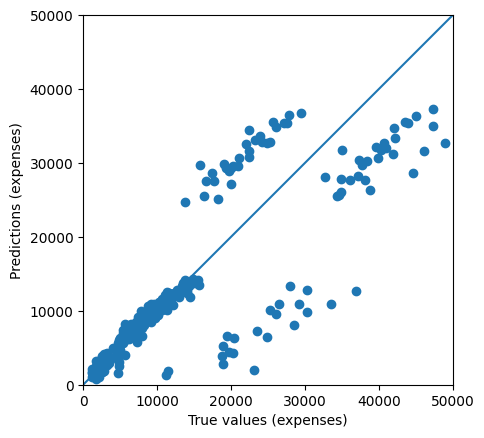

In [99]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
